In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#INTRODUCTION
#Diabetes is a chronic medical condition that occurs when the body is unable to effectively regulate blood sugar (glucose) 
#levels. Glucose is a vital source of energy for the body's cells, but in individuals with diabetes, the body either does not 
#produce enough insulin (a hormone that helps glucose enter cells) or cannot use insulin effectively. 
#This leads to elevated levels of glucose in the blood, which, over time, can result in serious health complications such as
#heart disease, kidney failure, vision loss, and nerve damage.

#There are two primary types of diabetes:

#Type 1 Diabetes: An autoimmune condition where the body’s immune system attacks insulin-producing cells in the pancreas, 
#leading to little or no insulin production.
#Type 2 Diabetes: The more common form, characterized by insulin resistance, where the body’s cells do not respond properly to 
#insulin. It is often associated with lifestyle factors such as obesity and inactivity.
#Gestational Diabetes is another form that can occur during pregnancy and usually resolves after childbirth, though it can 
#increase the risk of developing Type 2 diabetes later in life.

#Early detection and effective management of diabetes are crucial to preventing complications. Machine learning models can play
#a significant role in predicting the likelihood of diabetes in patients based on various health metrics, enabling timely 
#intervention and personalized care

In [3]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Data Cleaning
# Replace zeros with the median in specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)

In [6]:
# Exploratory Data Analysis (EDA)
# Set the style for the plots
sns.set(style="whitegrid")

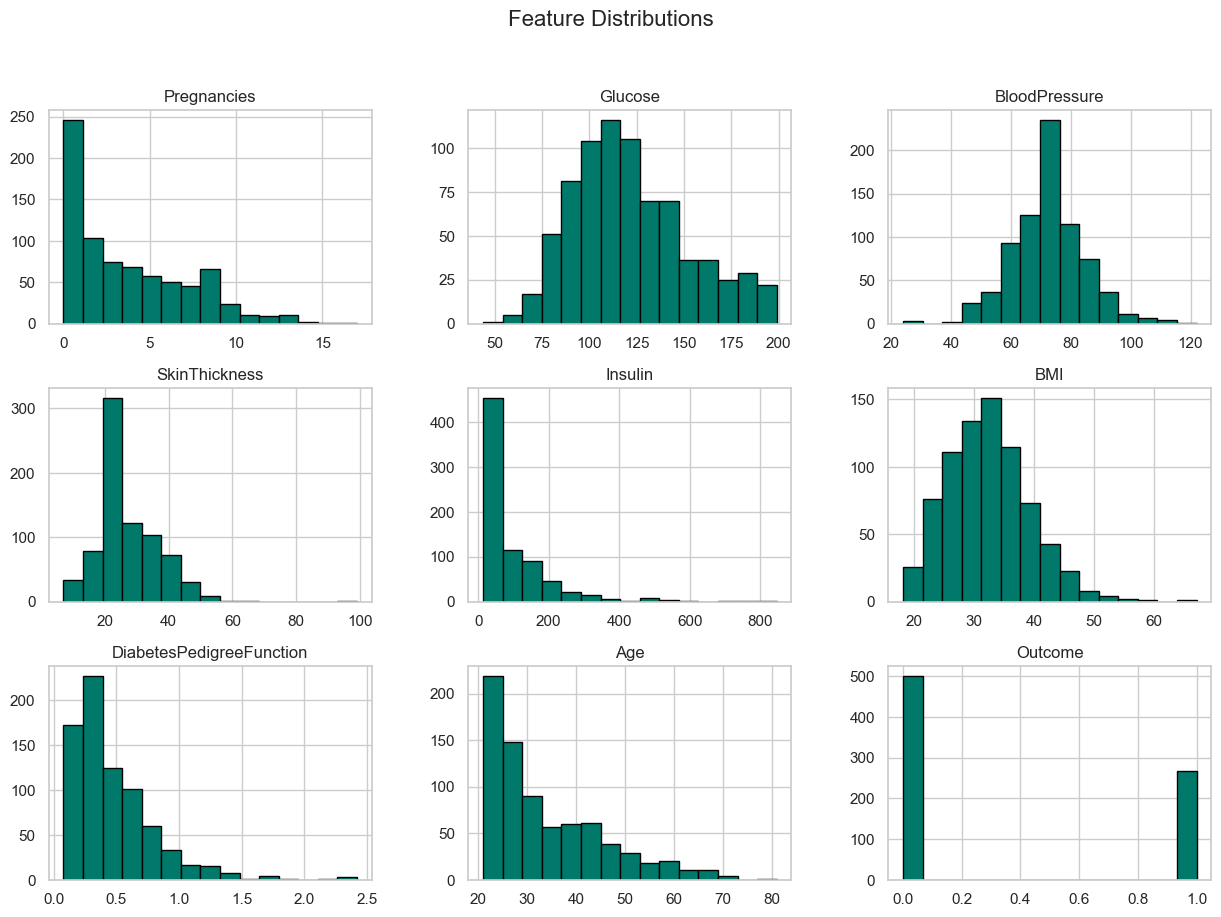

In [7]:
# Plot the distribution of each feature
data.hist(bins=15, figsize=(15, 10), color='#00796B', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

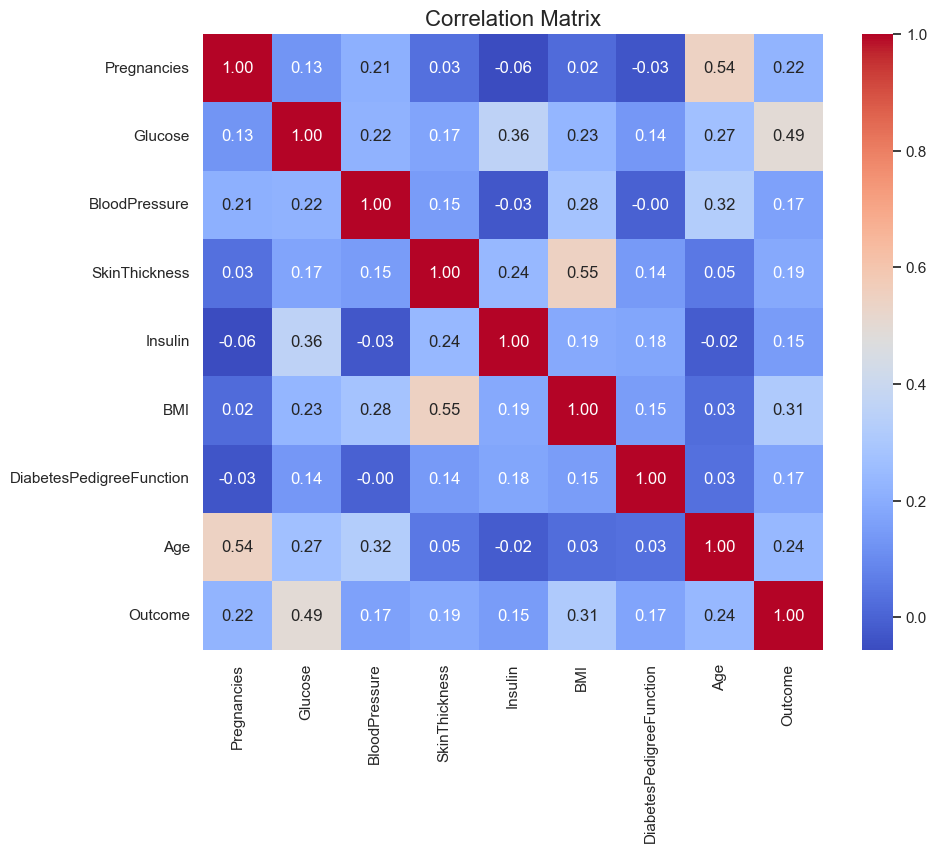

In [8]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

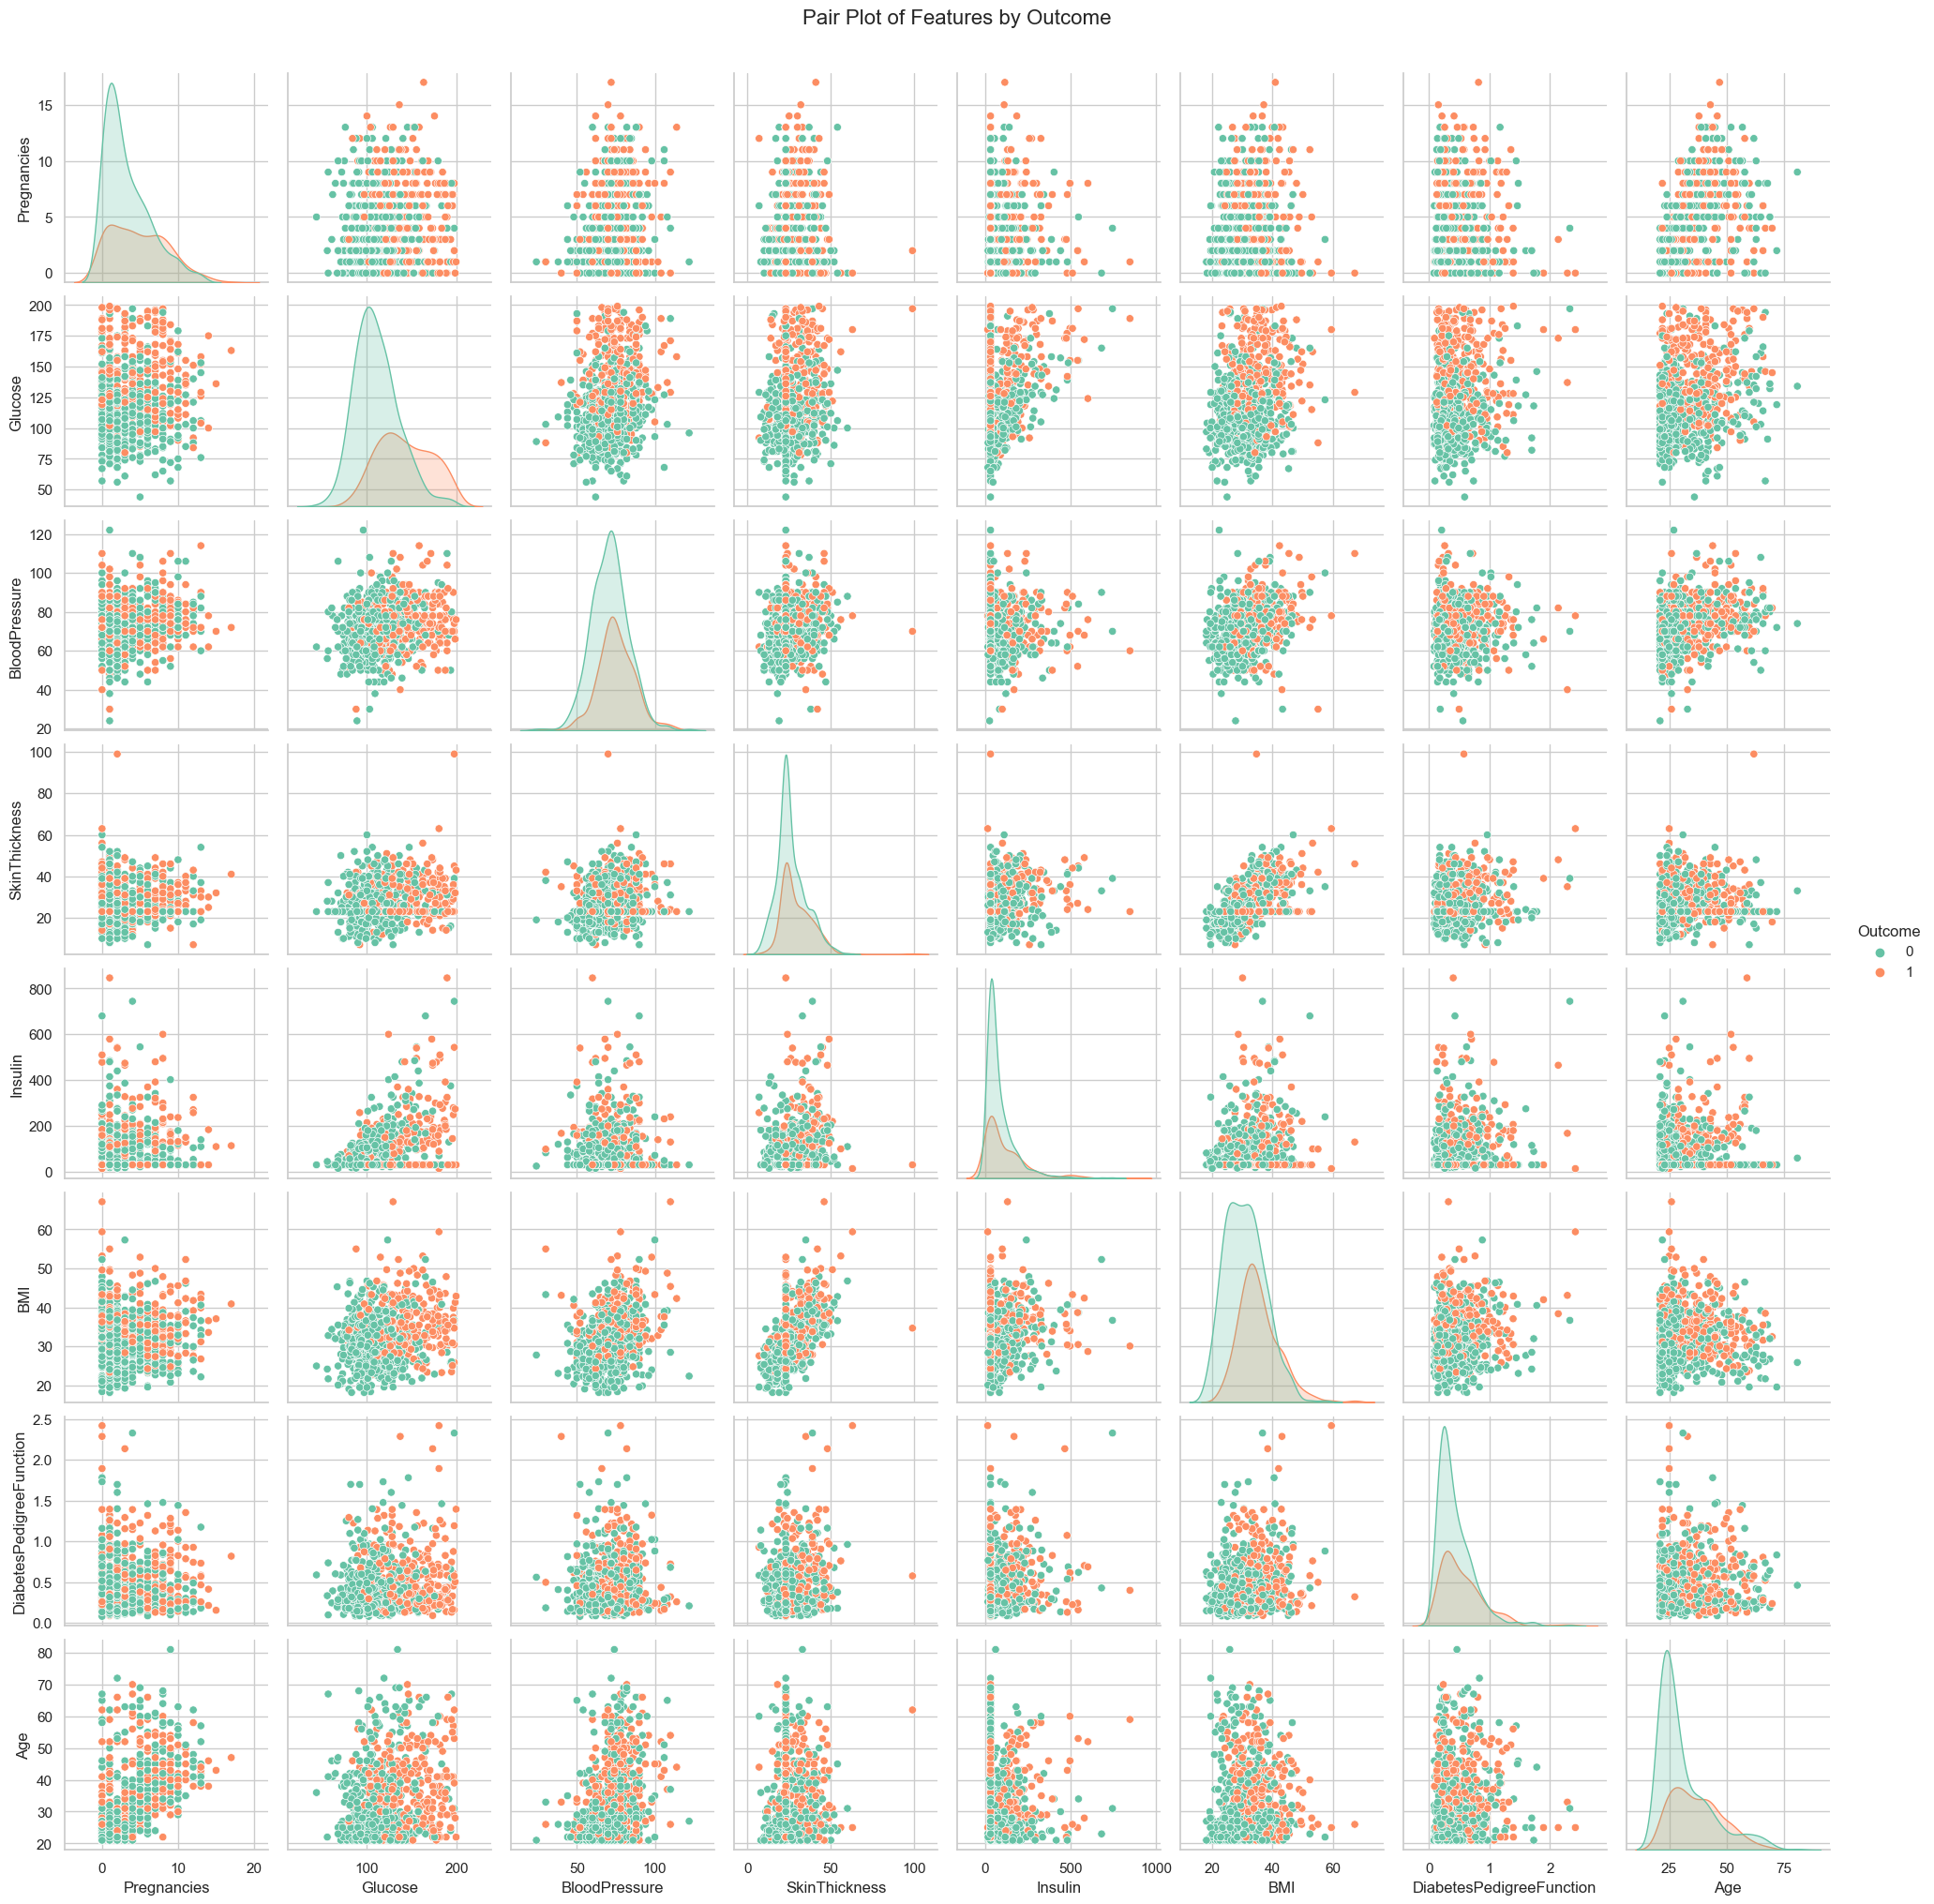

In [9]:
# Pair plot to visualize relationships and Outcome comparison
sns.pairplot(data, hue='Outcome', palette='Set2')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02, fontsize=16)
plt.show()

In [10]:
# Data Preprocessing
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Model Building
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [15]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7662337662337663
Confusion Matrix:
 [[82 17]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [16]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [17]:
# Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7662337662337663
Confusion Matrix:
 [[80 19]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



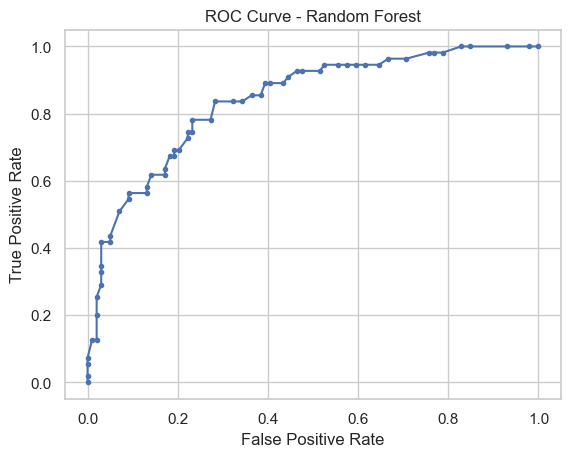

In [18]:
# ROC-AUC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

In [19]:
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest ROC-AUC Score: 0.840495867768595


In [20]:
# Step 8: Hyperparameter Tuning (Optional)
# You can use GridSearchCV to optimize hyperparameters for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
